**Problem 6**
Write an elementary Python program that calculates the bond’s value, its Macaulay duration, and its
modified duration based upon querying the user for the pertinent inputs, including the following
parameters:
- Coupon rate (stated in APR)
- Term to maturity
- YTM (stated in APR)
- Par value (or can permit the user to simply hit “enter” to accept the default of $1,000)
- Compounding (or can permit the user to simply hit “enter” to accept the default of semiannual compounding)

**Problem 7**
Draw a bond value/yield graph as part of the Python program you wrote for Number 6.


Welcome to bond calculator
Bond Value is: $1000.0
Macaulay Duration is: 4.053910837822025
Modified Duration is: 3.860867464592405


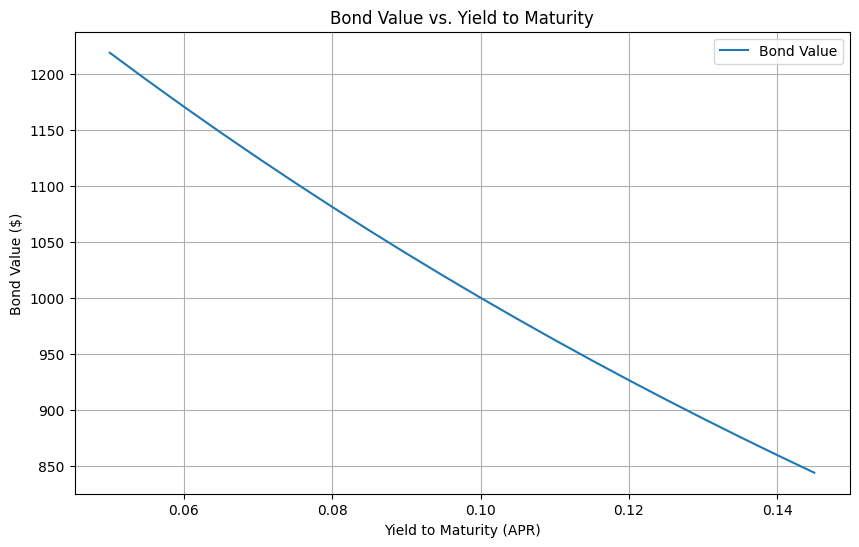

In [26]:
import matplotlib.pyplot as plt

#This is just a helper function used to let a user accept a default value
def get_input(prompt, default_value):       
    user_input = (input(prompt))
    if user_input == "":
        return int(default_value)
    return float(user_input)

#This calculates bond value with given values for yield curve
def calculateBondValueYieldCurve(per_c_rate, periods,ytm, par, compounding):
    #calculations to convert variables from per year to per period
    bond_value = 0
    periods = periods
    per_c_rate = per_c_rate
    per_ytm = ytm/compounding
    per_ytm = round(per_ytm, 4)
    dcf_list = []

    #loop through all cash flows and discount them to present
    for x in range(periods):
        per_cf = par*per_c_rate
        dcf = per_cf / ((1+per_ytm)**(x+1))
        dcf_list.append(dcf)
        
        bond_value += dcf
        
    #add pv of final par payment at end period
    bond_value += par/((1+per_ytm)**periods)
    dcf_list[periods-1] = dcf_list[periods-1] + par/((1+per_ytm)**periods)
    bond_value = round(bond_value, 2)
    
    #print("Bond Value is: $" + str(bond_value) + " for YTM of: " + str(per_ytm*compounding))
    return bond_value


#This calculates bond value with user input
def calculateBondValue():
    print("Welcome to bond calculator")
    c_rate = float(input("Please enter the coupon rate as decimal percentage (in APR): "))
    term = int(input("Please enter the term to maturity in years: "))
    ytm = float(input("Please enter the yield to maturity as decimal percentage (in APR): "))
    par = get_input("Please enter the par value, or leave blank to accept $1000 default value: ", 1000)
    compounding = get_input("Please enter compounding in terms of periods per year(1 for annual, 2 for semiannual, etc), or leave blank to accept semiannual default value: ", 2)

    #calculations to convert variables from per year to per period
    bond_value = 0
    periods = int(compounding*term)
    per_c_rate = (c_rate/compounding)
    per_ytm = ytm/compounding
    dcf_list = []

    #loop through all cash flows and discount them to present
    for x in range(periods):
        per_cf = par*per_c_rate
        dcf = per_cf / ((1+per_ytm)**(x+1))
        dcf_list.append(dcf)
        
        bond_value += dcf
        
    #add pv of final par payment at end period
    bond_value += par/((1+per_ytm)**periods)
    dcf_list[periods-1] = dcf_list[periods-1] + par/((1+per_ytm)**periods)
    bond_value = round(bond_value, 2)
    
    print("Bond Value is: $" + str(bond_value))

    per_duration = 0

    #use dcf values calculated in previous loop for duration values
    for x in range(len(dcf_list)):
        per_duration += (dcf_list[x] * (x+1))/bond_value

    mcc_duration = per_duration/compounding
    print("Macaulay Duration is: " + str(mcc_duration))

    mod_duration = mcc_duration/(1+per_ytm)
    print("Modified Duration is: " + str(mod_duration))


    #Problem 7 working on yield curve
    #First find the range of YTM's to test, I chose to do +/- 5% of the user inputted YTM
    #Then, use same bond calculator just with new ytm value
    YTM_list = []
    if (ytm < .05):
        ytm_ctr = 0.0
    else:
        ytm_ctr = ytm - .05

    while(ytm_ctr <= ytm + .05):
        YTM_list.append([round(ytm_ctr, 4), calculateBondValueYieldCurve(per_c_rate, periods, ytm_ctr, par, compounding)])
        ytm_ctr += .005

    
    #This code then plots the values from the tuples in the YTM list to show bond value vs yield
    ytm_values = [ytm for ytm, value in YTM_list]
    bond_values = [value for ytm, value in YTM_list]

    

    plt.figure(figsize=(10, 6))
    plt.plot(ytm_values, bond_values, label='Bond Value')
    plt.xlabel('Yield to Maturity (APR)')
    plt.ylabel('Bond Value ($)')
    plt.title('Bond Value vs. Yield to Maturity')
    plt.grid(True)
    plt.legend()
    plt.show()


    

calculateBondValue()
